In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import xarray as xr
import os

%load_ext autoreload
%autoreload 2

Task 1a)

In [15]:
import utils

path = os.getcwd()
t_daily = utils.munich_station_daily(location=path, to_xarray = True)
t_daily

<xarray.Dataset>
Dimensions:  (time: 23955)
Coordinates:
  * time     (time) datetime64[ns] 1954-06-01 1954-06-02 ... 2019-12-31
Data variables:
    t_mean   (time) float64 14.0 13.2 16.6 15.2 15.2 ... 3.7 -0.1 -1.6 0.0 3.0
    t_max    (time) float64 17.6 19.7 21.9 17.3 17.7 ... 4.9 2.0 2.5 6.0 8.6
    t_min    (time) float64 10.4 9.7 8.2 11.8 13.7 ... 1.7 -2.1 -4.8 -4.4 -0.5
    precip   (time) float64 0.0 0.5 0.0 1.2 6.0 2.3 ... 1.5 4.9 0.0 0.0 0.0 0.0

**Numpy functions:**

In [11]:
# generate data (for demonstration purpose)
data = np.random.normal(size=(1_000))
print("data.shape", data.shape)

two_by_thress_samples = np.random.choice(data, size=(2,3))
print("two_by_thress_samples.shape", two_by_thress_samples.shape)

mean_along_0th_axis = np.mean(two_by_thress_samples, axis=0)
print("mean_along_0th_axis.shape", mean_along_0th_axis.shape)

data.shape (1000,)
two_by_thress_samples.shape (2, 3)
mean_along_0th_axis.shape (3,)


Task 1b)

In [30]:
cats_and_dogs = t_daily.where(t_daily.precip>20, drop = True)
cats_and_dogs

<xarray.Dataset>
Dimensions:  (time: 551)
Coordinates:
  * time     (time) datetime64[ns] 1954-06-21 1954-07-01 ... 2019-10-02
Data variables:
    t_mean   (time) float64 22.0 12.1 9.9 9.0 8.5 ... 15.9 19.9 20.8 9.7 12.0
    t_max    (time) float64 29.3 17.4 13.1 10.7 9.2 ... 18.3 24.3 27.6 11.4 15.7
    t_min    (time) float64 16.6 10.5 8.6 8.0 8.2 8.0 ... 13.9 16.1 16.1 8.2 5.9
    precip   (time) float64 23.3 27.5 55.9 60.7 42.2 ... 22.0 46.0 25.4 28.7

In [46]:
random = np.zeros(10000)
for i in range(len(random)):    
    random[i] = np.random.choice(t_daily.t_mean, size=len(cats_and_dogs.precip)).mean() 

(array([  16.,  138.,  641., 1787., 2736., 2635., 1425.,  501.,  105.,
          16.]),
 array([ 8.34246824,  8.59181488,  8.84116152,  9.09050817,  9.33985481,
         9.58920145,  9.83854809, 10.08789474, 10.33724138, 10.58658802,
        10.83593466]),
 <BarContainer object of 10 artists>)

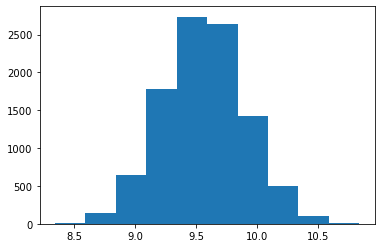

In [48]:
plt.hist(random)

In [54]:
print(cats_and_dogs.t_mean.mean().values)
print(np.quantile(random, (0.025, 0.975)))

12.889655172413795
[ 8.90253176 10.22995009]
